In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def to_pixel_arrays(my_df, activation_threshold=0, x_dimension=16, y_dimension=16):
    pixel_arrays_flat = my_df.to_numpy() 
    num_activated_pixels = np.sum((pixel_arrays_flat > activation_threshold), axis=1)
    pixel_arrays = pixel_arrays_flat.reshape(-1, y_dimension, x_dimension) 
    x_sizes = np.sum(np.any(pixel_arrays > activation_threshold, axis=1), axis=1) 
    y_sizes = np.sum(np.any(pixel_arrays > activation_threshold, axis=2), axis=1)
    
    return pixel_arrays_flat, pixel_arrays, num_activated_pixels, x_sizes, y_sizes

In [3]:
train_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_3sr/shuffled/dataset_3sr_16x16_50x12P5_parquets/contained/train/*.parquet'))
test_df = pd.read_parquet(glob.glob('/data/dajiang/smart-pixels/dataset_3sr/shuffled/dataset_3sr_16x16_50x12P5_parquets/contained/test/*.parquet'))
df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
print(f'Total number of events: {len(df)}')
print(f'Number of training events: {len(train_df)}')
print(f'Number of validation events: {len(test_df)}')

Total number of events: 521492
Number of training events: 417039
Number of validation events: 104453


In [5]:
train_df

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,...,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119
0,-303.674652,-78.382797,100.0,11.482230,3.331135,-1.837807,54626.0,52.861301,-3.804460,-6.247789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-41.107529,10.851102,100.0,0.016143,-0.008012,-0.103335,12505.0,-7.899840,-0.103646,-0.156220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-82.675400,42.521221,100.0,4.469836,-2.016907,-2.763970,20498.0,-21.752701,3.421620,-1.617180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-141.527390,-54.290024,100.0,2.382395,2.440120,-1.586296,19251.0,47.953602,2.910410,-1.501860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.703339,82.336571,100.0,2.471738,-3.121196,-2.553084,13089.0,-37.231899,-4.032380,-0.968138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417034,64.387787,-21.348925,100.0,-0.146879,1.347851,-2.389247,7859.0,17.195000,-2.743210,0.061475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417035,-20.353054,-67.418205,100.0,-2.968734,3.540236,-2.414252,20791.0,44.012798,-4.285080,1.229670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417036,203.373138,-77.720566,100.0,-9.676998,2.249137,-1.857026,41294.0,37.460602,2.916710,5.211019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417037,21.259865,-28.945414,100.0,0.890418,0.862868,-1.425653,10137.0,17.501499,-1.666440,-0.624569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_df

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,...,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119
0,-284.132812,13.573592,100.0,11.475278,-0.131263,-2.222723,45165.0,-1.343890,2.226610,-5.162712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.245537,-19.102407,100.0,-2.664979,0.171192,-1.544665,19451.0,3.733490,1.554120,1.725280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,359.299835,-15.771921,100.0,-5.282127,0.275457,-0.905182,53705.0,9.711640,0.946166,5.835431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-155.104858,-49.207546,100.0,4.876391,1.770981,-1.420136,27763.0,36.268600,-2.270060,-3.433749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.348408,-8.840474,100.0,5.042104,0.620604,-4.710573,10459.0,4.139770,4.751280,-1.070380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104448,100.319656,-15.478010,100.0,-6.122937,-0.410980,-3.066467,18017.0,-4.381700,-3.093880,1.996740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104449,-37.250221,62.752888,100.0,2.239372,-3.046384,-3.931675,9844.0,-23.527201,-4.973780,-0.569572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104450,-169.516708,-23.606197,100.0,6.637705,2.361582,-2.697804,21999.0,25.829500,-3.585420,-2.460410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104451,344.284058,10.175915,100.0,-16.134386,-0.510899,-2.960481,65517.0,-5.387880,3.004250,5.449920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
sum(df['original_atEdge'])

0

/tmp/ipykernel_183894/89229482.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


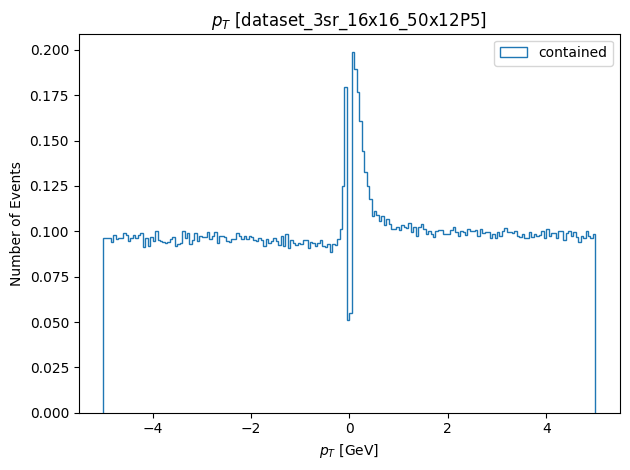

In [8]:
fig, ax = plt.subplots()

ax.hist(df['pt'], bins=200, histtype='step', density=True, label='contained')
ax.legend()
ax.set_title(r'$p_T$ [dataset_3sr_16x16_50x12P5]')
ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel(r'Number of Events')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/pt.png', dpi=300)
fig.show()

In [9]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(df['x-midplane'], bins=200, histtype='step', label='contained')
ax[0].set_title(r'x-midplane [dataset_3sr_16x16_50x12P5]')
ax[0].set_xlabel(r'x-midplane [$\mu$m]')
ax[0].set_ylabel(r'Number of Events (Normalized)')
ax[0].legend()

ax[1].hist(df['y-midplane'], bins=200, histtype='step', label='contained')
ax[1].set_title(r'y-midplane [dataset_3sr_16x16_50x12P5]')
ax[1].set_xlabel(r'y-midplane [$\mu$m]')
ax[1].set_ylabel(r'Number of Events (Normalized)')
ax[1].legend()

ax[2].hist(df['cotAlpha'], bins=np.linspace(-10,10,200), histtype='step', label='contained')
ax[2].set_title(r'cot$\alpha$ [dataset_3sr_16x16_50x12P5]')
ax[2].set_xlabel(r'cot$\alpha$')
ax[2].set_ylabel(r'Number of Events (Normalized)')
ax[2].legend()

ax[3].hist(df['cotBeta'], bins=np.linspace(-,200), histtype='step', label='contained')
ax[3].set_title(r'cot$\beta$ [dataset_3sr_16x16_50x12P5]')
ax[3].set_xlabel(r'cot$\beta$')
ax[3].set_ylabel(r'Number of Events (Normalized)')
ax[3].legend()

fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/labels.png', dpi=300)
fig.show()

SyntaxError: invalid syntax (3684132658.py, line 21)

/tmp/ipykernel_3408968/2015290544.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


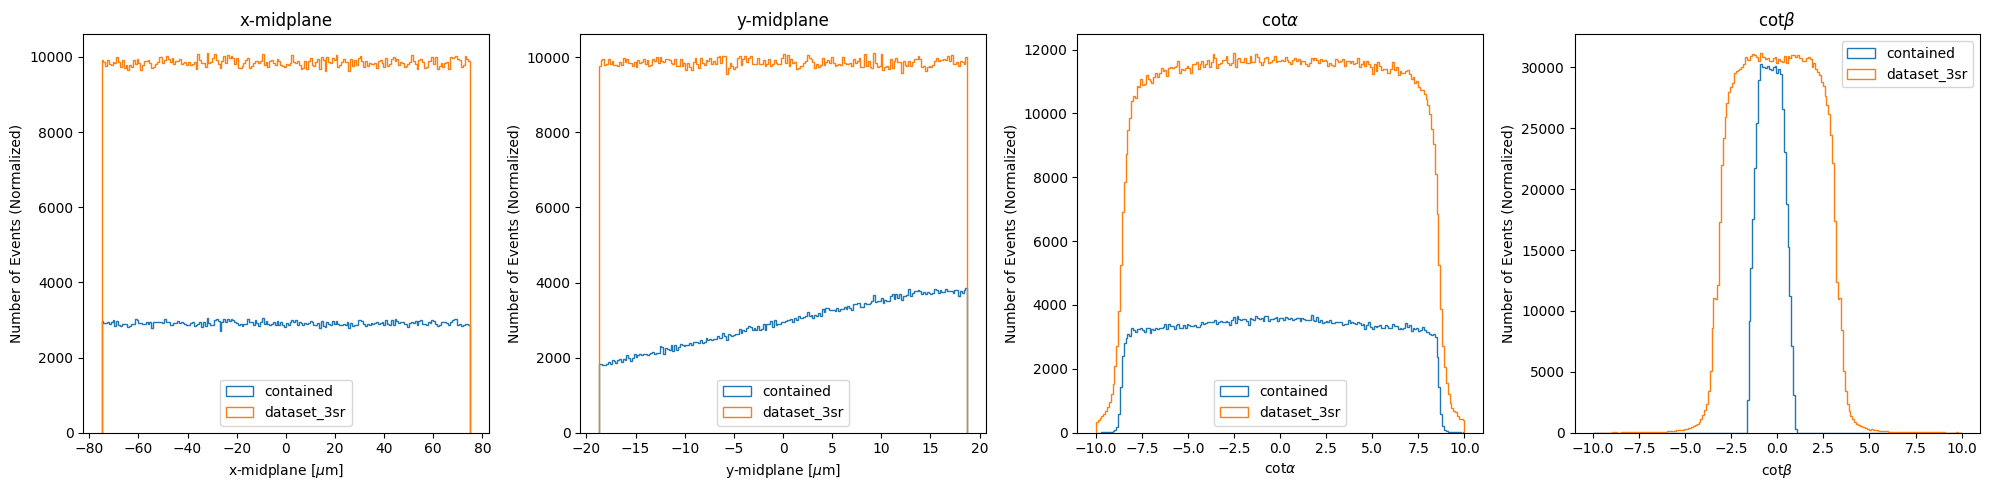

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(df['x-midplane'], bins=200, histtype='step', label='contained')
ax[0].set_title(r'x-midplane')
ax[0].set_xlabel(r'x-midplane [$\mu$m]')
ax[0].set_ylabel(r'Number of Events (Normalized)')
ax[0].legend()

ax[1].hist(df['y-midplane'], bins=200, histtype='step', label='contained')
ax[1].set_title(r'y-midplane')
ax[1].set_xlabel(r'y-midplane [$\mu$m]')
ax[1].set_ylabel(r'Number of Events (Normalized)')
ax[1].legend()

ax[2].hist(df['cotAlpha'], bins=np.linspace(-10,10,200), histtype='step', label='contained')
ax[2].set_title(r'cot$\alpha$')
ax[2].set_xlabel(r'cot$\alpha$')
ax[2].set_ylabel(r'Number of Events (Normalized)')
ax[2].legend()

ax[3].hist(df['cotBeta'], bins=np.linspace(-10,10,200), histtype='step', label='contained')
ax[3].set_title(r'cot$\beta$')
ax[3].set_xlabel(r'cot$\beta$')
ax[3].set_ylabel(r'Number of Events (Normalized)')
ax[3].legend()

fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/labels_vs_default.png', dpi=300)
fig.show()

In [ ]:
final_timeslice_df = df.iloc[:,-256:]
final_timeslice_df

,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,...,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pixel_arrays_flat, pixel_arrays, num_activated_pixels, x_sizes, y_sizes = to_pixel_arrays(final_timeslice_df, 400, x_dimension=16, y_dimension=16)

/tmp/ipykernel_1069546/3656880118.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


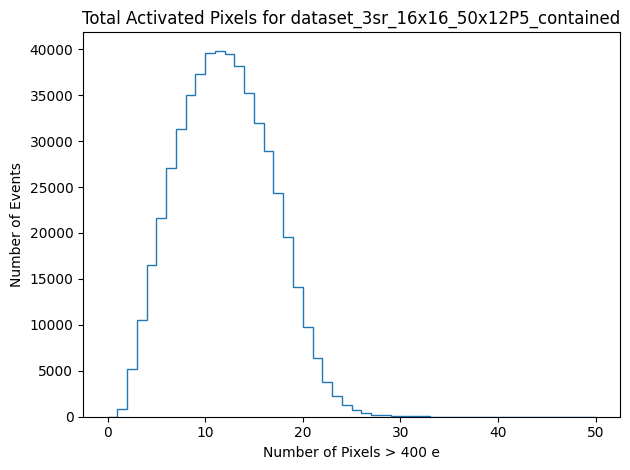

In [ ]:
fig, ax = plt.subplots()

ax.hist(num_activated_pixels, bins=np.linspace(0,50,51), histtype='step')
ax.set_xlabel('Number of Pixels > 400 e')
ax.set_ylabel('Number of Events')
ax.set_title('Total Activated Pixels for dataset_3sr_16x16_50x12P5_contained')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/num_activated_pixels.png', dpi=300)
fig.show()

/tmp/ipykernel_1069546/2480187811.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


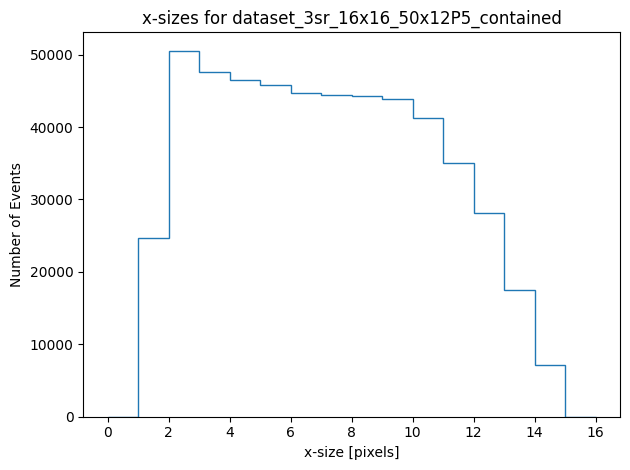

In [ ]:
fig, ax = plt.subplots()

ax.hist(x_sizes, bins=np.linspace(0,16,17), histtype='step')
ax.set_xlabel('x-size [pixels]')
ax.set_ylabel('Number of Events')
ax.set_title('x-sizes for dataset_3sr_16x16_50x12P5_contained')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/x_size.png', dpi=300)
fig.show()

/tmp/ipykernel_1069546/4172680249.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


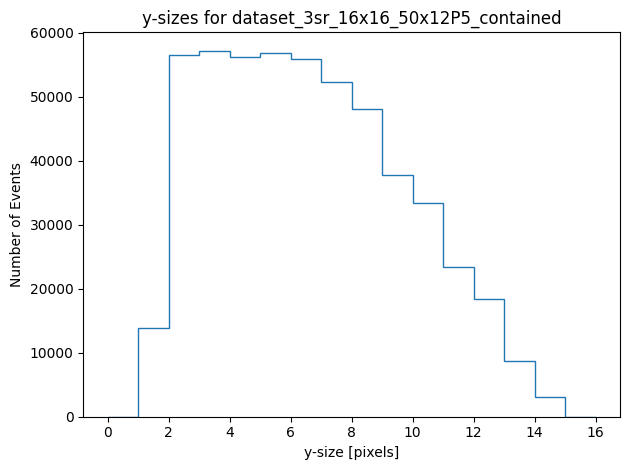

In [ ]:
fig, ax = plt.subplots()

ax.hist(y_sizes, bins=np.linspace(0,16,17), histtype='step')
ax.set_xlabel('y-size [pixels]')
ax.set_ylabel('Number of Events')
ax.set_title('y-sizes for dataset_3sr_16x16_50x12P5_contained')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_16x16_contained_plots/y_size.png', dpi=300)
fig.show()

In [ ]:
# Get the maximum and minimum charge for each event
pixel_arrays_inclusive = pixel_arrays_flat
pixel_arrays_flat[pixel_arrays_flat <= 400] = np.nan
max_charge = np.nanmax(pixel_arrays_flat, axis=1)
min_charge = np.nanmin(pixel_arrays_flat, axis=1)
mean_charge = np.nanmean(pixel_arrays_flat, axis=1)
median_charge = np.nanmedian(pixel_arrays_flat, axis=1)


/tmp/ipykernel_1069546/4114286789.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


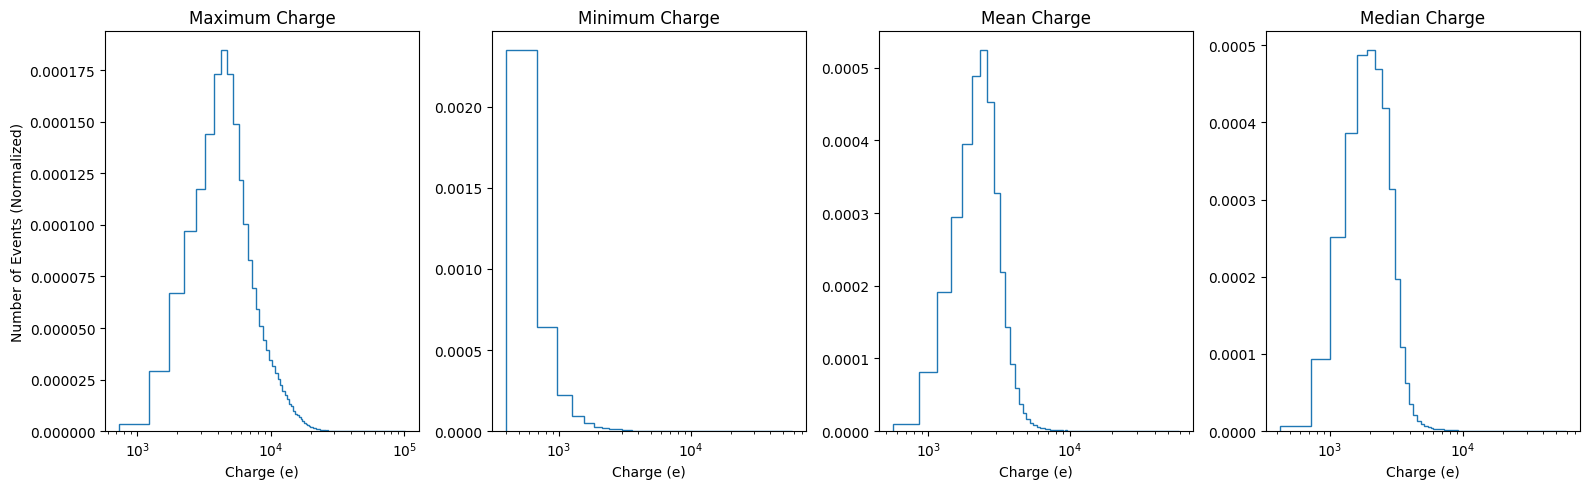

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16,5))
ax[0].hist(max_charge, histtype='step', bins=200, density=True)
ax[0].set_xscale('log')
ax[0].set_xlabel('Charge (e)')
ax[0].set_ylabel('Number of Events (Normalized)')
ax[0].set_title('Maximum Charge')

ax[1].hist(min_charge, histtype='step', bins=200, density=True)
ax[1].set_xscale('log')
ax[1].set_xlabel('Charge (e)')
#ax[1].set_ylabel('Number of Events')
ax[1].set_title('Minimum Charge')

ax[2].hist(mean_charge, histtype='step', bins=200, density=True)
ax[2].set_xscale('log')
ax[2].set_xlabel('Charge (e)')
#ax[2].set_ylabel('Number of Events')
ax[2].set_title('Mean Charge')

ax[3].hist(median_charge, histtype='step', bins=200, density=True)
ax[3].set_xscale('log')
ax[3].set_xlabel('Charge (e)')
#ax[3].set_ylabel('Number of Events')
ax[3].set_title('Median Charge')

fig.tight_layout()
fig.show()

/tmp/ipykernel_1069546/4117246589.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Maximum charge --> minimum = 735.0, maximum = 100770.0
Minimum charge --> minimum = 401.0, maximum = 58171.0
Mean charge --> minimum = 567.0, maximum = 59115.0
Median charge --> minimum = 424.0, maximum = 59115.0


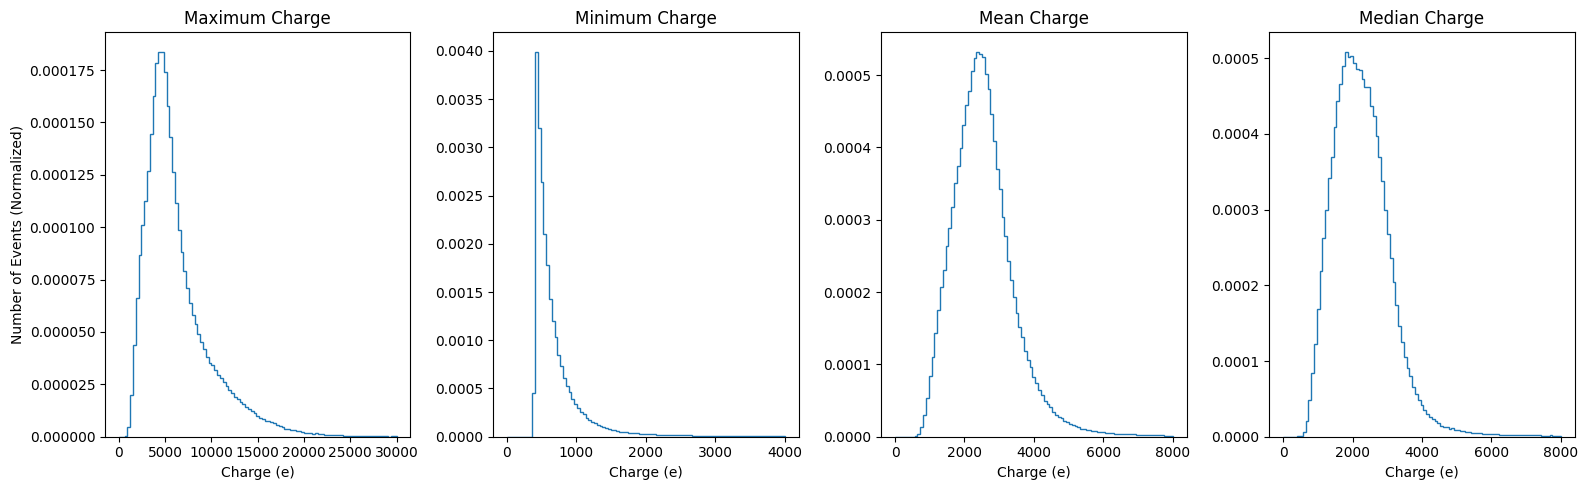

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16,5))
ax[0].hist(max_charge, histtype='step', bins=np.linspace(0,30000,100), density=True)
ax[0].set_xlabel('Charge (e)')
ax[0].set_ylabel('Number of Events (Normalized)')
ax[0].set_title('Maximum Charge')

ax[1].hist(min_charge, histtype='step', bins=np.linspace(0,4000,100), density=True)
ax[1].set_xlabel('Charge (e)')
ax[1].set_title('Minimum Charge')

ax[2].hist(mean_charge, histtype='step', bins=np.linspace(0,8000,100), density=True)
ax[2].set_xlabel('Charge (e)')
ax[2].set_title('Mean Charge')

ax[3].hist(median_charge, histtype='step', bins=np.linspace(0,8000,100), density=True)
ax[3].set_xlabel('Charge (e)')
ax[3].set_title('Median Charge')

fig.tight_layout()
fig.show()
print(f'Maximum charge --> minimum = {np.nanmin(max_charge)}, maximum = {np.nanmax(max_charge)}')
print(f'Minimum charge --> minimum = {np.nanmin(min_charge)}, maximum = {np.nanmax(min_charge)}')
print(f'Mean charge --> minimum = {np.nanmin(mean_charge)}, maximum = {np.nanmax(mean_charge)}')
print(f'Median charge --> minimum = {np.nanmin(median_charge)}, maximum = {np.nanmax(median_charge)}')